In [ ]:
from sklearn.datasets import load_iris
iris = load_iris() #loads iris
data = iris.data[:, :4] #sepal length and width & petal length and width
y = iris.target
print(data)
print(y)
print(iris.feature_names)
print(iris.target_names)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, y, test_size=0.2, random_state=101)
print(train_data)
print(test_data)
print(train_labels)
print(test_labels)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(15)
clf.fit(train_data, train_labels)
y_pred_NN = clf.predict(test_data)
print(y_pred_NN)
##  print(accuracy_score(test_labels, y_pred_NN, normalize=True))

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(data, y)
y_pred_decision = tree_clf.predict(test_data)
print(y_pred_decision)

In [ ]:
print(tree_clf)
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = iris.feature_names[:4],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
import graphviz
with open("iris_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
print(accuracy_score(test_labels, y_pred_NN, normalize=True))
print(accuracy_score(test_labels, y_pred_decision, normalize=True))

120
Accuracy results for KNN group:

0.9333333333333333
0.9333333333333333
1.0
0.7666666666666667
0.6
0.6666666666666666
0.8
0.26666666666666666
0.9333333333333333
0.9333333333333333

Accuracy results for Decision Tree group:

0.7333333333333333
0.9333333333333333
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


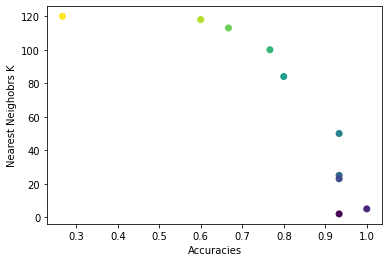

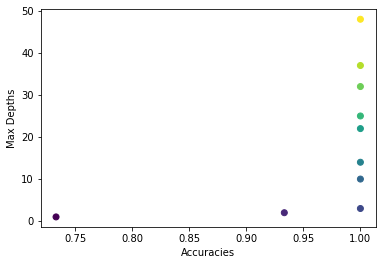

In [9]:
## Extra credit
print(test_data.size) ## K < size of the test data
clfs = [KNeighborsClassifier(25), KNeighborsClassifier(50), KNeighborsClassifier(5), KNeighborsClassifier(100), KNeighborsClassifier(118), KNeighborsClassifier(113), KNeighborsClassifier(84), KNeighborsClassifier(120), KNeighborsClassifier(2), KNeighborsClassifier(23)]
y_pred_NNs = [0] * 10
tree_clfs = [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=10), DecisionTreeClassifier(max_depth=14), DecisionTreeClassifier(max_depth=22), DecisionTreeClassifier(max_depth=25), DecisionTreeClassifier(max_depth=32), DecisionTreeClassifier(max_depth=37), DecisionTreeClassifier(max_depth=48)]
y_pred_decisions = [0] * 10
accuracy_scores_KNN = [0] * 10
accuracy_scores_DT = [0] * 10
DT_labels = [1, 2, 3, 10, 14, 22, 25, 32, 37, 48]
KNN_labels = [25, 50, 5, 100, 118, 113, 84, 120, 2, 23]
KNN_group = [[accuracy_scores_KNN], [KNN_labels]]
DT_group = [[accuracy_scores_DT], [DT_labels]]
print("Accuracy results for KNN group:\n")
for i in range(10): 
  clfs[i].fit(train_data, train_labels)
  y_pred_NNs[i] = clfs[i].predict(test_data)
  accuracy_scores_KNN[i] = accuracy_score(test_labels, y_pred_NNs[i], normalize=True)
  print(accuracy_scores_KNN[i])
print("\nAccuracy results for Decision Tree group:\n")
for j in range(10):
  tree_clfs[j].fit(data, y)
  y_pred_decisions[j] = tree_clfs[j].predict(test_data)
  accuracy_scores_DT[j] = accuracy_score(test_labels, y_pred_decisions[j], normalize=True)
  print(accuracy_scores_DT[j])

# Plot the accuracy scores
import matplotlib.pyplot as plt
from numpy import *
import operator
def visualizeKNN(accuracy_scores_KNN, KNN_labels):
  unique_labels, color = unique(KNN_labels, return_inverse=True)
  scatter = plt.scatter(accuracy_scores_KNN, KNN_labels, c=color)
  plt.xlabel('Accuracies')
  plt.ylabel('Nearest Neighobrs K')
  plt.show()
visualizeKNN(accuracy_scores_KNN, KNN_labels)
def visualizeDT(accuracy_scores_DT, DT_labels):
  unique_labels, color = unique(DT_labels, return_inverse=True)
  scatter = plt.scatter(accuracy_scores_DT, DT_labels, c=color)
  plt.xlabel('Accuracies')
  plt.ylabel('Max Depths')
  plt.show()
visualizeDT(accuracy_scores_DT, DT_labels)